In [ ]:
!pip install --quiet optuna

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
import numpy as np
import pandas as pd 
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import optuna
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder




In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
df.drop(columns= ['Id'], inplace = True)

In [ ]:
df.describe()

,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.575342,1057.429452,1162.626712,346.992466,1515.463699,1.565068,2.866438,180921.195890
std,1.112799,438.705324,386.587738,436.528436,525.480383,0.550916,0.815778,79442.502883
min,1.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,34900.000000
25%,5.000000,795.750000,882.000000,0.000000,1129.500000,1.000000,2.000000,129975.000000
50%,5.000000,991.500000,1087.000000,0.000000,1464.000000,2.000000,3.000000,163000.000000
75%,6.000000,1298.250000,1391.250000,728.000000,1776.750000,2.000000,3.000000,214000.000000
max,9.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,8.000000,755000.000000


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,SalePrice
OverallCond,1.000000,-0.171098,-0.144203,0.028942,-0.079686,-0.194149,0.012980,-0.077856
TotalBsmtSF,-0.171098,1.000000,0.819530,-0.174512,0.454868,0.323722,0.050450,0.613581
1stFlrSF,-0.144203,0.819530,1.000000,-0.202646,0.566024,0.380637,0.127401,0.605852
2ndFlrSF,0.028942,-0.174512,-0.202646,1.000000,0.687501,0.421378,0.502901,0.319334
GrLivArea,-0.079686,0.454868,0.566024,0.687501,1.000000,0.630012,0.521270,0.708624
FullBath,-0.194149,0.323722,0.380637,0.421378,0.630012,1.000000,0.363252,0.560664
BedroomAbvGr,0.012980,0.050450,0.127401,0.502901,0.521270,0.363252,1.000000,0.168213
SalePrice,-0.077856,0.613581,0.605852,0.319334,0.708624,0.560664,0.168213,1.000000


In [ ]:
df.columns

Index(['OverallCond', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'SalePrice'],
      dtype='object')

In [ ]:
df.duplicated().sum()
df.drop_duplicates()


,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,SalePrice
0,5,856,856,854,1710,2,3,208500
1,8,1262,1262,0,1262,2,3,181500
2,5,920,920,866,1786,2,3,223500
3,5,756,961,756,1717,1,3,140000
4,5,1145,1145,1053,2198,2,4,250000
...,...,...,...,...,...,...,...,...
1455,5,953,953,694,1647,2,3,175000
1456,6,1542,2073,0,2073,2,3,210000
1457,9,1152,1188,1152,2340,2,4,266500
1458,6,1078,1078,0,1078,1,2,142125


checking co relation among the features

In [ ]:
df.isna().sum()

OverallCond     0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

In [ ]:
If = IsolationForest()
If.fit(df)
df['anamoly'] = If.predict(df)
df.anamoly.value_counts()
df= df.loc[df.anamoly == 1]
df.drop(columns = ['anamoly'], inplace = True)

<ipython-input-18-96771e0ae82b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['anamoly'], inplace = True)


In [ ]:
y= df.SalePrice
df.drop(columns = ['SalePrice'], inplace = True)

<ipython-input-19-0e27db630e51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['SalePrice'], inplace = True)


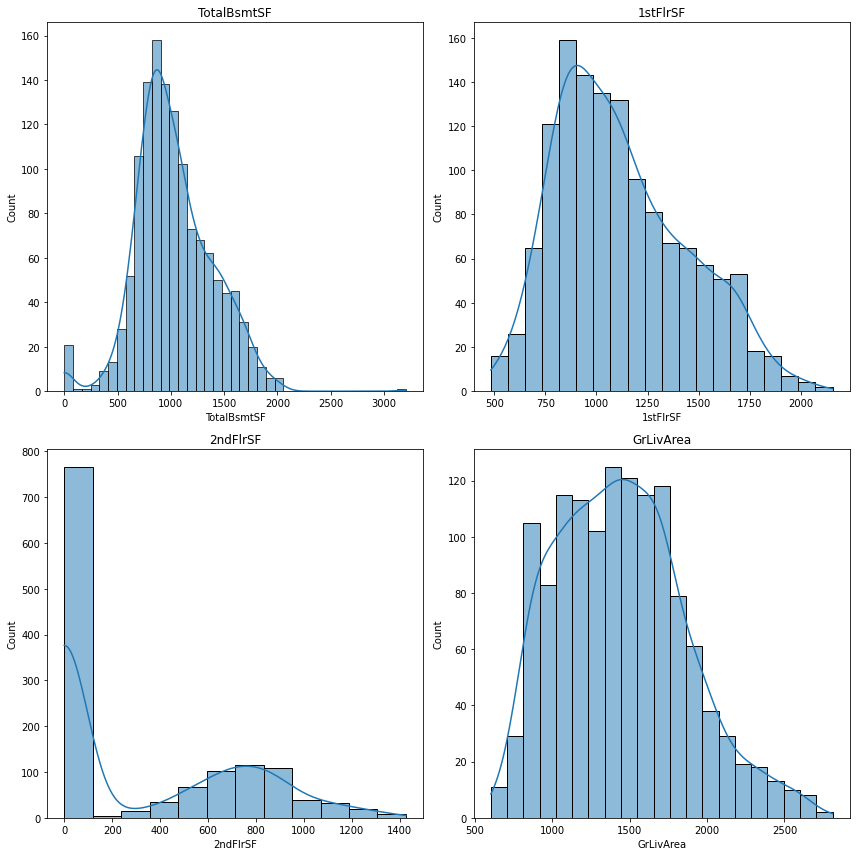

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (12,12))
for i, ax in enumerate(axes.flat):
    if i < len(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']):
        sns.histplot(x= df[(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea'][i])], ax=ax, kde = True)
        ax.set_title(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea'][i])   
    else:
        axes.flat[i].set_visible(False)
plt.tight_layout()
plt.show()

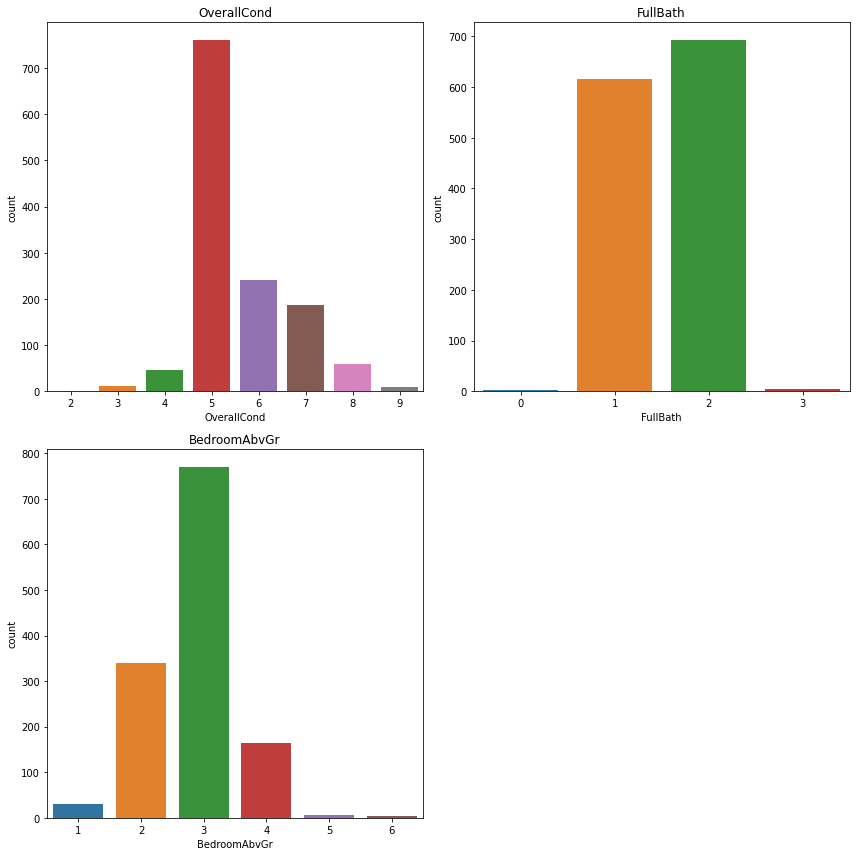

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (12,12))
for i, ax in enumerate(axes.flat):
    if i < len(['OverallCond', 'FullBath', 'BedroomAbvGr']):
        sns.countplot(x= df[(['OverallCond', 'FullBath', 'BedroomAbvGr'][i])], ax=ax)
        ax.set_title(['OverallCond', 'FullBath', 'BedroomAbvGr'][i])   
    else:
        axes.flat[i].set_visible(False)
plt.tight_layout()
plt.show()

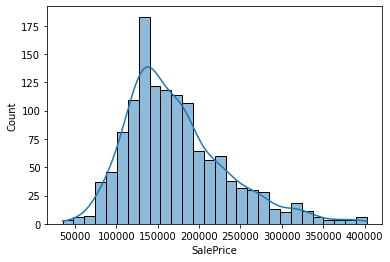

In [ ]:
sns.histplot(x = y, kde = True)
plt.show()

In [ ]:
trainx, testx, trainy,testy = train_test_split(df, y, train_size = 0.7, random_state = 100)  

Splitting into test and train

In [ ]:
trainxcon = trainx.loc[: , ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']]
ss = StandardScaler()
trainxcon = pd.DataFrame(ss.fit_transform(trainxcon), columns = trainxcon.columns, index = trainxcon.index)
testxcon = testx.loc[: , ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']]
testxcon = pd.DataFrame(ss.transform(testxcon), columns = testxcon.columns, index = testxcon.index)

In [ ]:
trainx.drop(columns = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea'], inplace = True)
testx.drop(columns = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea'], inplace = True)


In [ ]:
trainx = pd.merge(trainx, trainxcon, left_index=True, right_index=True, how='inner')
testx = pd.merge(testx, testxcon, left_index=True, right_index=True, how='inner')
testx.reset_index(drop= True, inplace = True)
trainx.reset_index(drop= True, inplace = True)

Resetting the index and performing outer join

In [ ]:
model = Ridge()
max_iter = np.array(range(100000, 1000000))
alpha = np.linspace(1, 10, 50)
solver = ['cholesky', 'svd', 'lsqr']
param = {'max_iter': max_iter, 'alpha': alpha, 'solver': solver}
rridge = RandomizedSearchCV(model, param, cv=50, scoring = 'neg_mean_squared_error', verbose=0)
n_iter = rridge.n_iter
with tqdm(total=n_iter) as pbar:
    for i in range(n_iter):
        rridge.set_params(n_iter=1)
        rridge.fit(trainx, trainy)
        pbar.update()
print(rridge.best_params_)

100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{'solver': 'svd', 'max_iter': 961027, 'alpha': 1.183673469387755}


Used RandomizedsearchCV for parameter tuning

In [ ]:
model = Ridge(solver = 'cholesky', max_iter = 237694, alpha =  6.142857142857143, random_state = 100)
model.fit(trainx, trainy)
predy = model.predict(testx)
print('RMSE:', mean_squared_error(testy, predy, squared = False))
print('R2 score:', r2_score(testy, predy))

RMSE: 31725.331603201223
R2 score: 0.7090588095296788


# The best model
## Ridge
RMSE: 29488.808323622874
R2 score: 0.864901959519436

In [ ]:
def obj_light(trial):
    params ={
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.1,1),
        'n_estimators': trial.suggest_int('n_estimators', 200,1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1,1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0,1)
    }
    optuna_model = LGBMRegressor(**params)
    cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
    scores = []
    for train_index, test_index in cv.split(df,y):
        trainx, testx = df.iloc[train_index], df.iloc[test_index]
        trainy, testy = y.iloc[train_index], y.iloc[test_index]
        optuna_model.fit(trainx, trainy)
        predy = optuna_model.predict(testx)
        scores.append(mean_squared_error(testy, predy, squared = False))
        return np.mean(scores)
study_light = optuna.create_study(direction = 'minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
n_trials = 50
with tqdm(total = n_trials) as pbar:
    for i in range(n_trials):
        study_light.optimize(obj_light, n_trials = 1)
        pbar.update(1)

[I 2023-03-26 19:51:34,013] A new study created in memory with name: no-name-eced3ef5-8f3b-49a1-bafa-eea6708aaeec
100%|██████████| 50/50 [00:42<00:00,  1.19it/s]


In [ ]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
rmse_lgb=[]
r_squared = []
for train_index, test_index in cv.split(df,y):
        trainx, testx = df.iloc[train_index], df.iloc[test_index]
        trainy, testy = y.iloc[train_index], y.iloc[test_index]
        model_lgb = LGBMRegressor(**study_light.best_params)
        model_lgb.fit(trainx,trainy,eval_set=[(testx,testy)],early_stopping_rounds=100,verbose= False )
        rmse_lgb.append(mean_squared_error(testy, model_lgb.predict(testx), squared=False))
        r_squared.append(r2_score(testy,model_lgb.predict(testx)))
print(np.mean(rmse_lgb))
print(np.mean(r_squared))

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecat

29619.699462108536
0.7585993864364979


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecat

In [ ]:
with open('my_model.pickle', 'wb') as f:
    pickle.dump(model_lgb, f)

In [ ]:
with open('my_model.pickle', 'rb') as f:
    model = pickle.load(f)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create dictionary for user input
user_input = {}
for feature in features:
    if feature in ['OverallCond', 'FullBath', 'BedroomAbvGr']:
        user_input[feature] = input(f"Enter {feature}: ")
    else:
        user_input[feature] = float(input(f"Enter {feature}: "))

# create label encoder for categorical features
encoder = LabelEncoder()
for feature in ['OverallCond', 'FullBath', 'BedroomAbvGr']:
    encoder.fit(np.unique(df[feature]))
    user_input[feature] = encoder.transform([user_input[feature]])[0]

# convert user input to numpy array
user_input_array = np.array(list(user_input.values())).reshape(1, -1)

# make predictions on user input using the loaded model
predicted_sale_price = model.predict(user_input_array)[0]

print(f"Predicted SalePrice: ${predicted_sale_price:.2f}")


Enter OverallCond: 6
Enter FullBath: 3
Enter BedroomAbvGr: 2
Enter TotalBsmtSF: 333
Enter 1stFlrSF: 333
Enter 2ndFlrSF: 3345
Enter GrLivArea: 4444
Predicted SalePrice: $98375.07
